<a href="https://colab.research.google.com/github/amaziarczyk/Projekt_rekrutacyjny_II_Aibnb/blob/main/Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PROJEKT MACHINE LEARNING** 

Dane zostały pobrane  ze strony Kaggle.com i dostarczają informacji o wynajmie AirBnB w Nowym Jorku. Model ma za zadanie przewidywanie ceny.   

Opis kolumn:
- id - numer id
- name - nazwa Airbnb
- host_id - id gospodarza
- host _name 	- nazwa gospodarza
- neighbourhood _group - pięć grup okręgów w Nowym Jorku	
- neighbourhood 	- dzielnica (część okręgu)
- latitude 	- długość geograficzna
- longitude - szerokość geograficzna	
- room_type - typ pokoju	
- price - cena	
- minimum_nights- minimalna liczba nocy 	
- number_of_reviews - liczba opini	
- last_review - ostatnia opinia	
- reviews_per_month - opinie na miesiąc	
- calculated_host_listings_count 	
- availability_365 - dostępność

In [ ]:
# import bibliotek

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import scipy
from sklearn import preprocessing
from sklearn import linear_model

In [ ]:
# załadowanie danych i tworzenie kopii
df= pd.read_csv("/content/drive/My Drive/Colab Notebooks/AB_NYC_2019.csv", sep=",")
df2=df.copy()
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Analiza wstępna- poznanie podstawowych informacji o zbiorze

In [ ]:
# usunięcie niepotrzebnych kolmn
df.drop(columns=['latitude','longitude'], inplace=True)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# sprawdzamy kształt ramki danych
print("Liczba wierszy w zbiorze:", df.shape[0])
print("Liczba kolumn w zbiorze:", df.shape[1])

Liczba wierszy w zbiorze: 48895
Liczba kolumn w zbiorze: 14


In [ ]:
# poznanie informacji o zmiennych (o typie i brakach danych)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  last_review                     38843 non-null  object 
 11  reviews_per_month               38843 non-null  float64
 12  calculated_host_listings_count  

Braki danych

In [ ]:
df=df.fillna(method='ffill')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,2019-05-21,0.38,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  last_review                     48895 non-null  object 
 11  reviews_per_month               48895 non-null  float64
 12  calculated_host_listings_count  

In [ ]:
# sprawdzamy statystyki opisowe dla zmiennych numerycznych
df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,152.720687,7.029962,23.274466,1.395810,7.143982,112.781327
std,1.098311e+07,7.861097e+07,240.154170,20.510550,44.550582,1.681327,32.952519,131.622289
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,69.000000,1.000000,1.000000,0.200000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,106.000000,3.000000,5.000000,0.790000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,175.000000,5.000000,24.000000,2.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
# kilka informacji o Nowym Yorku (NY)
{
  "Okręgi w NY": df['neighbourhood_group'].unique(),
  "Liczba okręgów w NY": df['neighbourhood_group'].nunique(),
 "Liczba dzielnic":df['neighbourhood'].nunique(),
 "Typy pokoji": df['room_type'].unique()
}

{'Liczba dzielnic': 221,
 'Liczba okręgów w NY': 5,
 'Okręgi w NY': array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
       dtype=object),
 'Typy pokoji': array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)}

In [ ]:
# liczba ofert według okręgu
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
# liczba ofert według dzielnic
df['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Willowbrook              1
New Dorp                 1
Woodrow                  1
Fort Wadsworth           1
Richmondtown             1
Name: neighbourhood, Length: 221, dtype: int64

In [ ]:
# średnia cena według okrędu
df.groupby('neighbourhood_group').agg(dict(price='mean')).sort_values(by='price', ascending=False)

,price
neighbourhood_group,
Manhattan,196.875814
Brooklyn,124.383207
Staten Island,114.812332
Queens,99.517649
Bronx,87.496792


In [ ]:
# średnia cena według dzielnicy
df.groupby("neighbourhood").agg(dict(price='mean')).sort_values(by='price', ascending=False)

,price
neighbourhood,
Fort Wadsworth,800.000000
Woodrow,700.000000
Tribeca,490.638418
Sea Gate,487.857143
Riverdale,442.090909
...,...
New Dorp,57.000000
Soundview,53.466667
Tremont,51.545455


In [ ]:
# liczba pokoi według typu
df['room_type'].value_counts() 

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [ ]:
# średnia cena według rodzaju pokoju
df.groupby("room_type").agg(dict(price='mean')).sort_values(by='price', ascending=False)

,price
room_type,
Entire home/apt,211.794246
Private room,89.780973
Shared room,70.127586


In [ ]:
# średnia cena według typu pokoju i okręgu
df.groupby(['room_type',"neighbourhood_group"]).agg(dict(price='mean')).sort_values(by='price', ascending=False)

price
room_type       neighbourhood_group            
Entire home/apt Manhattan            249.239109
                Brooklyn             178.327545
                Staten Island        173.846591
                Queens               147.050573
                Bronx                127.506596
Private room    Manhattan            116.776622
Shared room     Manhattan             88.977083
Private room    Brooklyn              76.500099
                Queens                71.762456
Shared room     Queens                69.020202
Private room    Bronx                 66.788344
                Staten Island         62.292553
Shared room     Bronx                 59.800000
                Staten Island         57.444444
                Brooklyn              50.527845

In [ ]:
# największy zarobek według okręgu
df.groupby(["neighbourhood_group", 'room_type']).agg(dict(price='sum')).sort_values(by='price', ascending=False)

price
neighbourhood_group room_type               
Manhattan           Entire home/apt  3289707
Brooklyn            Entire home/apt  1704633
Manhattan           Private room      932111
Brooklyn            Private room      775099
Queens              Entire home/apt   308218
                    Private room      241983
Bronx               Entire home/apt    48325
                    Private room       43546
Manhattan           Shared room        42709
Staten Island       Entire home/apt    30597
Brooklyn            Shared room        20868
Queens              Shared room        13666
Staten Island       Private room       11711
Bronx               Shared room         3588
Staten Island       Shared room          517

 Analiza cech

In [ ]:
import plotly.express as px

In [ ]:
df=df[df['price']<300]
px.box(df, y="price")

a) numerycznych

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



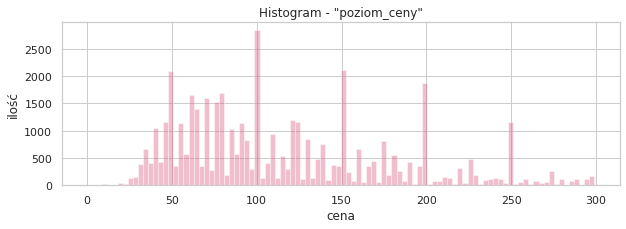

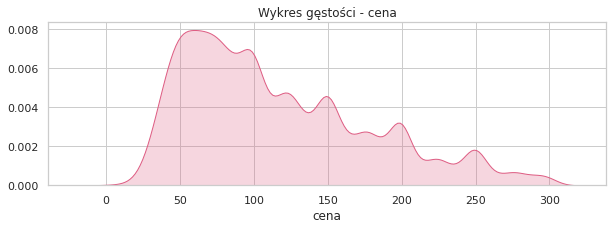

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



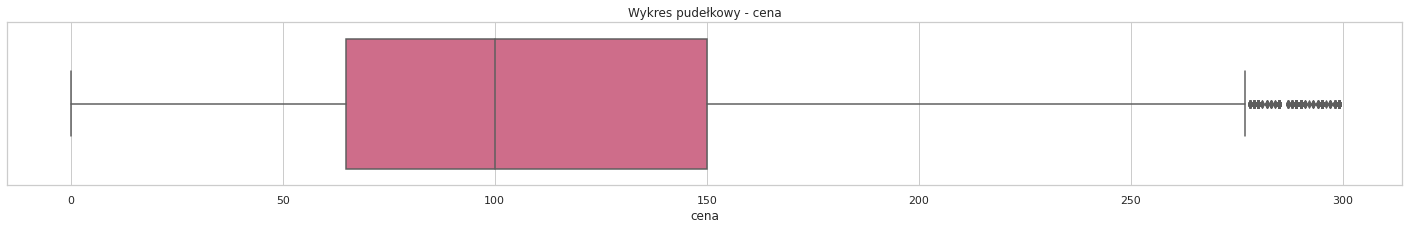

Odrzucam hipotezę zerową o rozkładzie normalnym. Brak rozkładu normalnego


In [ ]:
# histogram- rozkład zmiennej "price"- 
plt.figure(figsize=(10,3))
sns.set( style="whitegrid")

sns.distplot(df['price'], 
             kde = False, 
             bins = 100, 
             color = '#de5d83').set(title = 'Histogram - "poziom_ceny"', xlabel = 'cena', ylabel = 'ilość')
plt.show()

# Wykres gęstości
plt.figure(figsize=(10,3))
sns.set(style="whitegrid")
sns.kdeplot(df['price'], shade = True, color = '#de5d83').set(title = 'Wykres gęstości - cena', xlabel = 'cena', ylabel = '')
plt.show()

# Wykres pudełkowy
plt.figure(figsize=(25,3))
sns.set(style="whitegrid")
sns.boxplot(df['price'], color = '#de5d83').set(title = 'Wykres pudełkowy - cena', xlabel = 'cena')
plt.show()

# Test na normalność rozkładu
# Zakładany poziom istotności alfa = 0.05.
if(scipy.stats.normaltest(df['price'])[1] < 0.05):
    print('Odrzucam hipotezę zerową o rozkładzie normalnym. Brak rozkładu normalnego')
else:
    print('Przyjmuję hipotezę zerową. Zmienna pochodzi z rozkładu normalnego.')


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



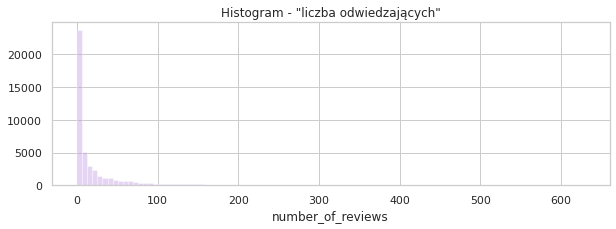

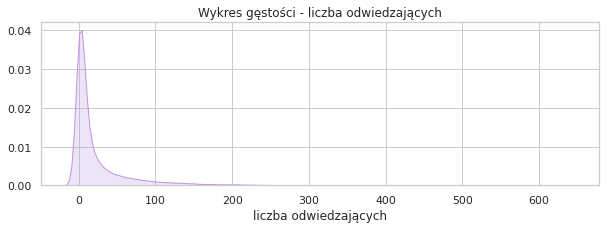

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



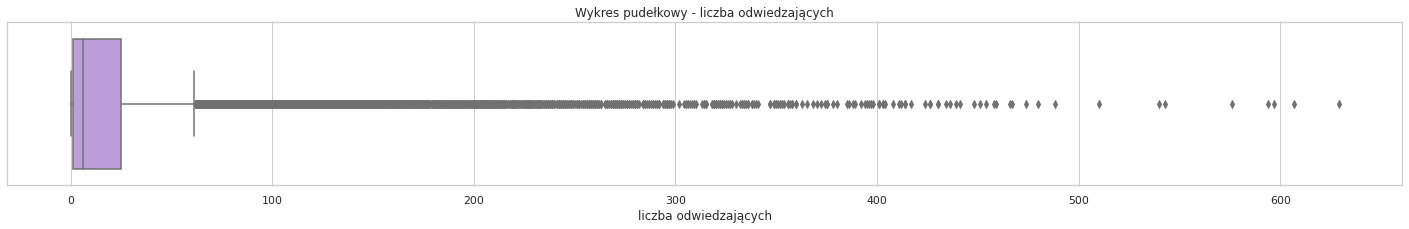

Odrzucam hipotezę zerową o rozkładzie normalnym. Brak rozkładu normalnego


In [ ]:
# histogram- rozkład zmiennej "number_of reviews"- 
plt.figure(figsize=(10,3))
sns.set( style="whitegrid")

sns.distplot(df['number_of_reviews'], 
             kde = False, 
             bins = 100, 
             color = '#bf94e4').set(title = 'Histogram - "liczba odwiedzających"')
plt.show()

# Wykres gęstości
plt.figure(figsize=(10,3))
sns.set(style="whitegrid")
sns.kdeplot(df['number_of_reviews'], shade = True, color = '#bf94e4').set(title = 'Wykres gęstości - liczba odwiedzających', xlabel = 'liczba odwiedzających', ylabel = '')
plt.show()

# Wykres pudełkowy
plt.figure(figsize=(25,3))
sns.set(style="whitegrid")
sns.boxplot(df['number_of_reviews'], color = '#bf94e4').set(title = 'Wykres pudełkowy - liczba odwiedzających', xlabel = 'liczba odwiedzających')
plt.show()

# Test na normalność rozkładu
# Zakładany poziom istotności alfa = 0.05.
if(scipy.stats.normaltest(df['number_of_reviews'])[1] < 0.05):
    print('Odrzucam hipotezę zerową o rozkładzie normalnym. Brak rozkładu normalnego')
else:
    print('Przyjmuję hipotezę zerową. Zmienna pochodzi z rozkładu normalnego.')


In [ ]:
df=df[df['number_of_reviews']<70]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



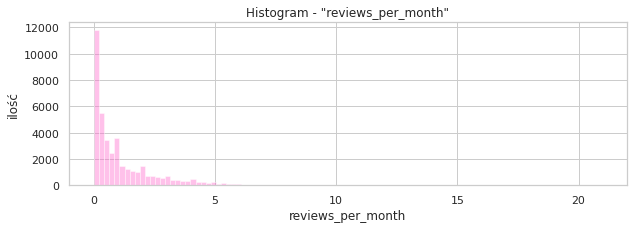

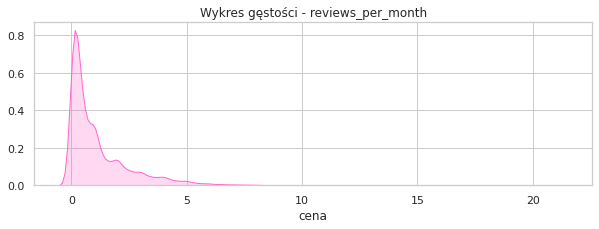

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



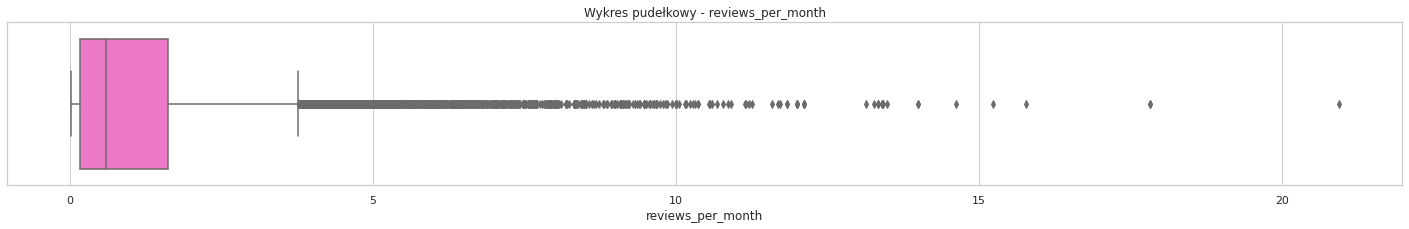

Odrzucam hipotezę zerową o rozkładzie normalnym. Brak rozkładu normalnego


In [ ]:
# rozkład zmiennej "reviews_per_month"
# histogram- rozkład zmiennej "price"- 
plt.figure(figsize=(10,3))
sns.set( style="whitegrid")

sns.distplot(df['reviews_per_month'], 
             kde = False, 
             bins = 100, 
             color = '#ff66cc').set(title = 'Histogram - "reviews_per_month"', xlabel = 'reviews_per_month', ylabel = 'ilość')
plt.show()

# Wykres gęstości
plt.figure(figsize=(10,3))
sns.set(style="whitegrid")
sns.kdeplot(df['reviews_per_month'], shade = True, color = '#ff66cc').set(title = 'Wykres gęstości - reviews_per_month', xlabel = 'cena', ylabel = '')
plt.show()

# Wykres pudełkowy
plt.figure(figsize=(25,3))
sns.set(style="whitegrid")
sns.boxplot(df['reviews_per_month'], color = '#ff66cc').set(title = 'Wykres pudełkowy - reviews_per_month', xlabel = 'reviews_per_month')
plt.show()

# Test na normalność rozkładu
# Zakładany poziom istotności alfa = 0.05.
if(scipy.stats.normaltest(df['reviews_per_month'])[1] < 0.05):
    print('Odrzucam hipotezę zerową o rozkładzie normalnym. Brak rozkładu normalnego')
else:
    print(scipy.stats.normaltest(df['reviews_per_month'])[1],'Przyjmuję hipotezę zerową. Zmienna pochodzi z rozkładu normalnego.')

In [ ]:
df=df[df['reviews_per_month']<4]

b) kategorycznych

Rozkład zmiennej "neighbourhood_group"
-------------------------
Brooklyn         0.428908
Manhattan        0.424249
Queens           0.116664
Bronx            0.022634
Staten Island    0.007545
Name: neighbourhood_group, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



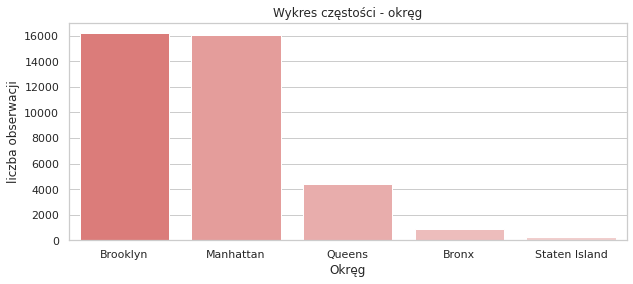

In [ ]:
# rozkład zmiennej
print('Rozkład zmiennej "neighbourhood_group"')
print('-------------------------')
print(df['neighbourhood_group'].value_counts(normalize = True))

# wykres czestości neighbourhood_group
plt.figure(figsize=(10,4))
sns.set(style="whitegrid")

sns.countplot(df['neighbourhood_group'], 
              palette = ['#eb6c6a', '#f0918f', '#f2a3a2', '#f5b5b4', '#f7c8c7'], 
              order = df['neighbourhood_group'].value_counts().index).set(title = 'Wykres częstości - okręg', xlabel = 'Okręg', ylabel = 'liczba obserwacji')
plt.show()



Rozkład zmiennej "room_type"
-------------------------
Entire home/apt    0.488048
Private room       0.485612
Shared room        0.026340
Name: room_type, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



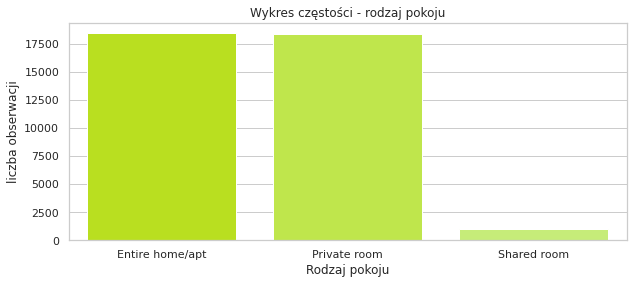

In [ ]:
# rozkład zmiennej
print('Rozkład zmiennej "room_type"')
print('-------------------------')
print(df['room_type'].value_counts(normalize = True))

# wykres częstości room_type
plt.figure(figsize=(10,4))
sns.set(style="whitegrid")

sns.countplot(df['room_type'], 
              palette = ['#ccff00', '#ccff33', '#ccff66'], 
              order = df['room_type'].value_counts().index).set(title = 'Wykres częstości - rodzaj pokoju', xlabel = 'Rodzaj pokoju', ylabel = 'liczba obserwacji')
plt.show()



# Zbiór danych do modelowania

In [ ]:
# cechy do modelowania
cechy_do_modelowania= ['price', 'neighbourhood_group','room_type', 'number_of_reviews','reviews_per_month','minimum_nights']
dane_do_modelowania= df[cechy_do_modelowania]
dane_do_modelowania.head()

,price,neighbourhood_group,room_type,number_of_reviews,reviews_per_month,minimum_nights
0,149,Brooklyn,Private room,9,0.21,1
1,225,Manhattan,Entire home/apt,45,0.38,1
2,150,Manhattan,Private room,0,0.38,3
4,80,Manhattan,Entire home/apt,9,0.10,10
6,60,Brooklyn,Private room,49,0.40,45


In [ ]:
# sprawdzenie typy danych i braku danych na zbiorze do modelowania
dane_do_modelowania.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37775 entries, 0 to 48894
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                37775 non-null  int64  
 1   neighbourhood_group  37775 non-null  object 
 2   room_type            37775 non-null  object 
 3   number_of_reviews    37775 non-null  int64  
 4   reviews_per_month    37775 non-null  float64
 5   minimum_nights       37775 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 3.3+ MB


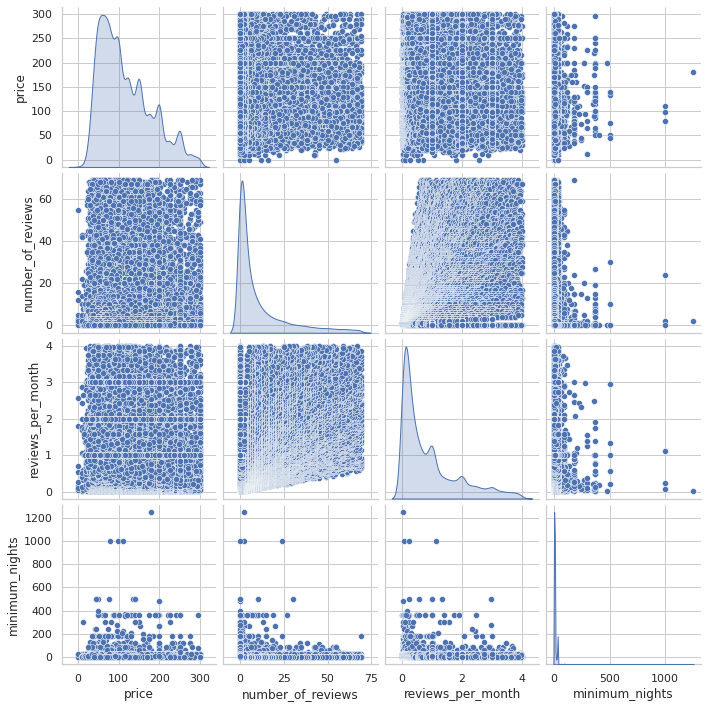

In [ ]:
# sprawdzenie zależniści między danymi do modelowania
sns.set(style="whitegrid")
sns.pairplot(dane_do_modelowania, diag_kind="kde") 

# Usuwanie wartości odstających

Usuwanie wartości odstających ze zmiennej price

In [ ]:
# zmienna price
def IQR_outliers(a):
  Q1, Q3 = np.percentile(a, [25, 75])
  IQR = Q3 - Q1

  gorne_ograniczenie  = Q3 + (1.5 * IQR)
  dolne_ograniczenie  = Q1 - (1.5 * IQR)
  print("Górne ograniczenie:", gorne_ograniczenie)
  print("Dolne ograniczenie:", dolne_ograniczenie)

  indeksy = np.where((a > gorne_ograniczenie) | (a < dolne_ograniczenie))
  b = np.full(shape=a.shape[0], fill_value=1)
  b[indeksy] = -1
  
  return b

# użycie funkcji
dane_do_modelowania["flaga_IQR"] = IQR_outliers(dane_do_modelowania["price"])
print(dane_do_modelowania["flaga_IQR"])

# wizualizacja wartości odstających wg. przebiegu samochodu
px.scatter(dane_do_modelowania, 
           x = "price", 
           y = "number_of_reviews",
           color = "flaga_IQR", 
           title = "Rozrzut cechy - cena a wartości odstające",
           )

Górne ograniczenie: 277.5
Dolne ograniczenie: -62.5
0        1
1        1
2        1
4        1
6        1
        ..
48890    1
48891    1
48892    1
48893    1
48894    1
Name: flaga_IQR, Length: 37775, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# usuwanie obserwacji odstajacych wg. ceny
dane_do_modelowania_2 = dane_do_modelowania[dane_do_modelowania["flaga_IQR"]==1]
dane_do_modelowania_2.shape #zmniejszenie liczby wierszy

(37251, 7)

Usuwanie wartości odstających zmiennej number of reviews

In [ ]:
def IQR_outliers_2(a):
  Q1, Q3 = np.percentile(a, [25, 75])
  IQR = Q3 - Q1

  gorne_ograniczenie  = Q3 + (1.5 * IQR)
  dolne_ograniczenie  = Q1 - (1.5 * IQR)
  print("Górne ograniczenie:", gorne_ograniczenie)
  print("Dolne ograniczenie:", dolne_ograniczenie)

  indeksy = np.where((a > gorne_ograniczenie) | (a < dolne_ograniczenie))
  b = np.full(shape=a.shape[0], fill_value=1)
  b[indeksy] = -1
  
  return b

# użycie funkcji
dane_do_modelowania_2["flaga_IQR"] = IQR_outliers_2(dane_do_modelowania_2["number_of_reviews"])
print(dane_do_modelowania_2["flaga_IQR"])

# wizualizacja wartości odstających wg. przebiegu samochodu
px.scatter(dane_do_modelowania, 
           x = "number_of_reviews", 
           y = "price",
           color = "flaga_IQR", 
           title = "Rozrzut cechy - number of reviews a wartości odstające")

Górne ograniczenie: 33.5
Dolne ograniczenie: -18.5
0        1
1       -1
2        1
4        1
6       -1
        ..
48890    1
48891    1
48892    1
48893    1
48894    1
Name: flaga_IQR, Length: 37251, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Usuwanie wartości odstających zmiennej 

In [ ]:
# ,'reviews_per_month','calculated_host_listings_count','minimum_nights'

In [ ]:
def IQR_outliers_3(a):
  Q1, Q3 = np.percentile(a, [25, 75])
  IQR = Q3 - Q1

  gorne_ograniczenie  = Q3 + (1.5 * IQR)
  dolne_ograniczenie  = Q1 - (1.5 * IQR)
  print("Górne ograniczenie:", gorne_ograniczenie)
  print("Dolne ograniczenie:", dolne_ograniczenie)

  indeksy = np.where((a > gorne_ograniczenie) | (a < dolne_ograniczenie))
  b = np.full(shape=a.shape[0], fill_value=1)
  b[indeksy] = -1
  
  return b

# użycie funkcji
dane_do_modelowania_2["flaga_IQR"] = IQR_outliers_3(dane_do_modelowania_2["reviews_per_month"])
print(dane_do_modelowania_2["flaga_IQR"])

# wizualizacja wartości odstających wg. przebiegu samochodu
px.scatter(dane_do_modelowania, 
           x = "reviews_per_month", 
           y = "price",
           color = "flaga_IQR", 
           title = "Rozrzut cechy - reviews_per_month a wartości odstające")

Górne ograniczenie: 2.935
Dolne ograniczenie: -1.5050000000000001
0        1
1        1
2        1
4        1
6        1
        ..
48890    1
48891    1
48892    1
48893    1
48894    1
Name: flaga_IQR, Length: 37251, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Usuwanie wartości odstających zmiennej minimum_nights


In [ ]:
def IQR_outliers_5(a):
  Q1, Q3 = np.percentile(a, [25, 75])
  IQR = Q3 - Q1

  gorne_ograniczenie  = Q3 + (1.5 * IQR)
  dolne_ograniczenie  = Q1 - (1.5 * IQR)
  print("Górne ograniczenie:", gorne_ograniczenie)
  print("Dolne ograniczenie:", dolne_ograniczenie)

  indeksy = np.where((a > gorne_ograniczenie) | (a < dolne_ograniczenie))
  b = np.full(shape=a.shape[0], fill_value=1)
  b[indeksy] = -1
  
  return b

# użycie funkcji
dane_do_modelowania_2["flaga_IQR"] = IQR_outliers_5(dane_do_modelowania_2["minimum_nights"])
print(dane_do_modelowania_2["flaga_IQR"])

# wizualizacja wartości odstających wg. przebiegu samochodu
px.scatter(dane_do_modelowania, 
           x = "minimum_nights", 
           y = "price",
           color = "flaga_IQR", 
           title = "Rozrzut cechy - minimum_nights a wartości odstające")

Górne ograniczenie: 9.5
Dolne ograniczenie: -2.5
0        1
1        1
2        1
4       -1
6       -1
        ..
48890    1
48891    1
48892   -1
48893    1
48894    1
Name: flaga_IQR, Length: 37251, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# usuwanie obserwacji odstajacych wg. ceny
dane_do_modelowania_3 = dane_do_modelowania_2[dane_do_modelowania_2["flaga_IQR"]==1]
dane_do_modelowania_3.shape #zmniejszenie liczby wierszy

(31286, 7)

Obliczenie procentu usuniętych obserwacji

In [ ]:
print("Procent usuniętych obserwacji:", ((dane_do_modelowania_2.shape[0]-dane_do_modelowania_3.shape[0])/dane_do_modelowania_2.shape[0])*100,"%")

Procent usuniętych obserwacji: 16.01299293978685 %


In [ ]:
#usunięcie flag
dane_do_modelowania_3.head(2)

,price,neighbourhood_group,room_type,number_of_reviews,reviews_per_month,minimum_nights,flaga_IQR
0,149,Brooklyn,Private room,9,0.21,1,1
1,225,Manhattan,Entire home/apt,45,0.38,1,1


In [ ]:
dane_do_modelowania_4=dane_do_modelowania_3.drop(columns=['flaga_IQR'])
dane_do_modelowania_4.head(2)

,price,neighbourhood_group,room_type,number_of_reviews,reviews_per_month,minimum_nights
0,149,Brooklyn,Private room,9,0.21,1
1,225,Manhattan,Entire home/apt,45,0.38,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a58867048>,
      dtype=object)

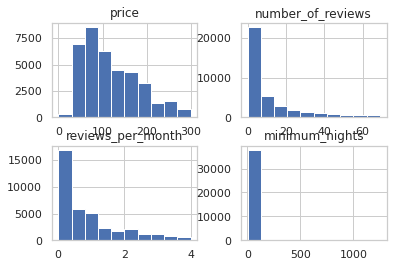

In [ ]:
# rozkład przed usunięciem wartości odstających
dane_do_modelowania.drop(columns=['flaga_IQR']).hist(bins=10)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a58ef7160>,
      dtype=object)

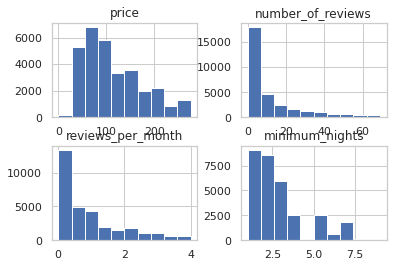

In [ ]:
#rozkład po usunięciu wartości odstających
dane_do_modelowania_4.hist(bins=10)

# Kodowanie zmiennych kategorycznych

In [ ]:
#sprawdzenie liczności grup "object"

dane_do_modelowania_4['neighbourhood_group'].value_counts()

Brooklyn         13938
Manhattan        12450
Queens            3844
Bronx              795
Staten Island      259
Name: neighbourhood_group, dtype: int64

In [ ]:
dane_do_modelowania_4['room_type'].value_counts()

Private room       16123
Entire home/apt    14328
Shared room          835
Name: room_type, dtype: int64

In [ ]:
# kodowanie grup "object" - get.dummies()
dane_do_modelowania_5=pd.get_dummies(dane_do_modelowania_4, columns=['neighbourhood_group','room_type'], prefix_sep= "_")
dane_do_modelowania_5

,price,number_of_reviews,reviews_per_month,minimum_nights,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,149,9,0.21,1,0,1,0,0,0,0,1,0
1,225,45,0.38,1,0,0,1,0,0,1,0,0
2,150,0,0.38,3,0,0,1,0,0,0,1,0
10,135,53,0.43,5,0,0,1,0,0,1,0,0
22,80,39,0.37,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48889,65,0,1.00,1,0,0,0,1,0,0,1,0
48890,70,0,1.00,2,0,1,0,0,0,0,1,0
48891,40,0,1.00,4,0,1,0,0,0,0,1,0
48893,55,0,1.00,1,0,0,1,0,0,0,0,1


# Ponownie sprawdzam korelację

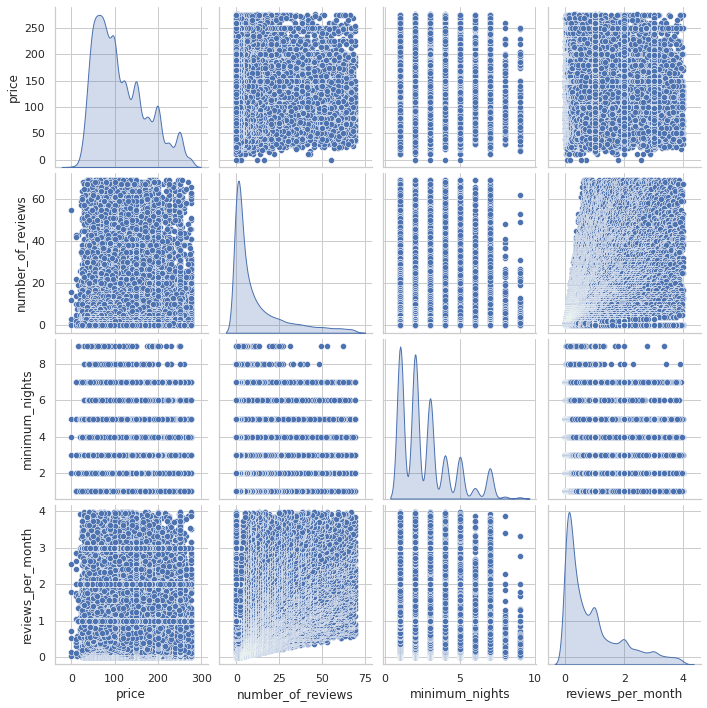

In [ ]:
# sprawdzam jak wygląda zależność po standaryzacji dla grup numerycznych price i number_of reviews
sns.set(style="whitegrid")
sns.pairplot(dane_do_modelowania_5[['price','number_of_reviews','minimum_nights','reviews_per_month']], diag_kind="kde") 

In [ ]:
#dane_do_modelowania_5=dane_do_modelowania_5.drop(columns=['price_standarize'])

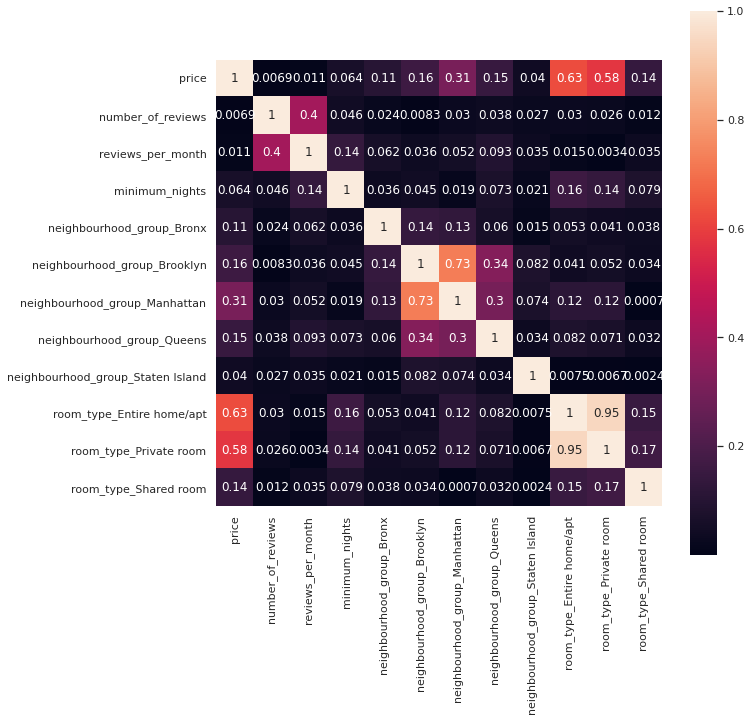

In [ ]:
korelacja= dane_do_modelowania_5.corr().abs()

plt.figure(figsize=(10,10))
sns.heatmap(korelacja, square=True, annot=True)   #-> brak silnie zależnych > 0.9 zmiennych zatem nie redukuję zmiennych

In [ ]:
macierz_filter=np.triu(np.ones(korelacja.shape),k=1).astype(np.bool)


In [ ]:
gorny_trojkat=korelacja.where(macierz_filter)
print(gorny_trojkat)

                                   price  ...  room_type_Shared room
price                                NaN  ...               0.143006
number_of_reviews                    NaN  ...               0.011512
reviews_per_month                    NaN  ...               0.035289
minimum_nights                       NaN  ...               0.078825
neighbourhood_group_Bronx            NaN  ...               0.037531
neighbourhood_group_Brooklyn         NaN  ...               0.034313
neighbourhood_group_Manhattan        NaN  ...               0.000696
neighbourhood_group_Queens           NaN  ...               0.032263
neighbourhood_group_Staten Island    NaN  ...               0.002380
room_type_Entire home/apt            NaN  ...               0.152212
room_type_Private room               NaN  ...               0.170755
room_type_Shared room                NaN  ...                    NaN

[12 rows x 12 columns]


In [ ]:
gorny_trojkat.max()

price                                     NaN
number_of_reviews                    0.006891
reviews_per_month                    0.403142
minimum_nights                       0.137586
neighbourhood_group_Bronx            0.105621
neighbourhood_group_Brooklyn         0.162581
neighbourhood_group_Manhattan        0.728729
neighbourhood_group_Queens           0.335474
neighbourhood_group_Staten Island    0.081895
room_type_Entire home/apt            0.627248
room_type_Private room               0.947842
room_type_Shared room                0.170755
dtype: float64

In [ ]:
#zdefiniowanie indeksów kolumn o korelacji 0.9
mocna_korelacja=[kolumna for kolumna in gorny_trojkat.columns if any (gorny_trojkat[kolumna]>0.8)]
print(gorny_trojkat)


                                   price  ...  room_type_Shared room
price                                NaN  ...               0.143006
number_of_reviews                    NaN  ...               0.011512
reviews_per_month                    NaN  ...               0.035289
minimum_nights                       NaN  ...               0.078825
neighbourhood_group_Bronx            NaN  ...               0.037531
neighbourhood_group_Brooklyn         NaN  ...               0.034313
neighbourhood_group_Manhattan        NaN  ...               0.000696
neighbourhood_group_Queens           NaN  ...               0.032263
neighbourhood_group_Staten Island    NaN  ...               0.002380
room_type_Entire home/apt            NaN  ...               0.152212
room_type_Private room               NaN  ...               0.170755
room_type_Shared room                NaN  ...                    NaN

[12 rows x 12 columns]


In [ ]:
#usunięcie silnej korelacji
dane_do_modelowania_5=X.drop(columns=mocna_korelacja)
dane_do_modelowania_5.head()

,price,number_of_reviews,minimum_nights,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Shared room
0,149,9,1,0,1,0,0,0,0,0
1,225,45,1,0,0,1,0,0,1,0
2,150,0,3,0,0,1,0,0,0,0
3,89,270,1,0,1,0,0,0,1,0
4,80,9,10,0,0,1,0,0,1,0


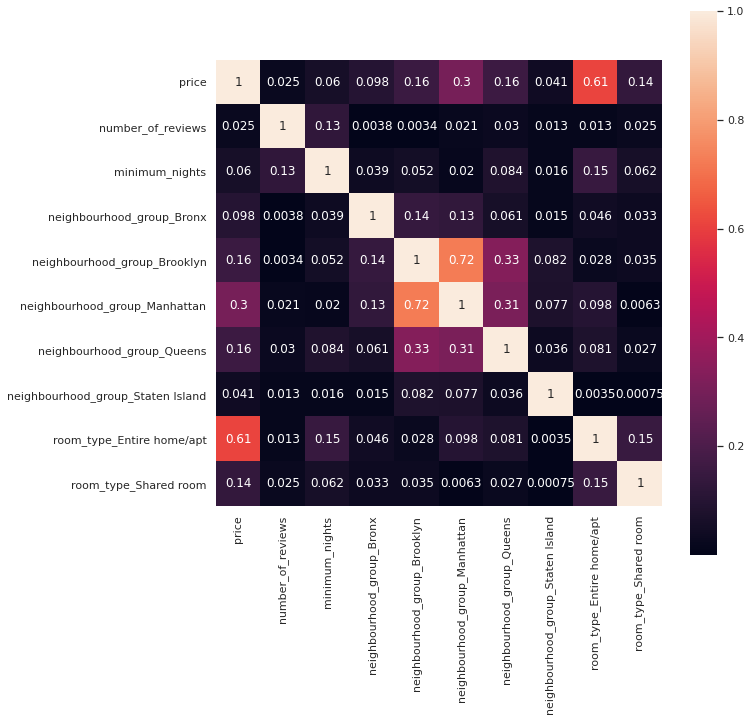

In [ ]:
korelacja2= dane_do_modelowania_5.corr().abs()

plt.figure(figsize=(10,10))
sns.heatmap(korelacja2, square=True, annot=True) 

In [ ]:
# sprawdzam czy nie pojawiły sie braki danych
dane_do_modelowania_5.info()         # -> brak wartości pustych 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39738 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   price                              39738 non-null  int64
 1   number_of_reviews                  39738 non-null  int64
 2   minimum_nights                     39738 non-null  int64
 3   neighbourhood_group_Bronx          39738 non-null  uint8
 4   neighbourhood_group_Brooklyn       39738 non-null  uint8
 5   neighbourhood_group_Manhattan      39738 non-null  uint8
 6   neighbourhood_group_Queens         39738 non-null  uint8
 7   neighbourhood_group_Staten Island  39738 non-null  uint8
 8   room_type_Entire home/apt          39738 non-null  uint8
 9   room_type_Shared room              39738 non-null  uint8
dtypes: int64(3), uint8(7)
memory usage: 1.5 MB


# Podział zbioru na uczący i testowy

In [ ]:
from sklearn import model_selection

In [ ]:
# tworzenie zbiorów
X= dane_do_modelowania_5.drop(columns=['price'])
y=dane_do_modelowania_5['price']

In [ ]:
# tworzenie zbiorów uczący i testowy
X_uczący, X_testowy, y_uczący, y_testowy=model_selection.train_test_split(X,y.values,
                                                                          test_size=0.2,
                                                                          random_state=2020)

In [ ]:
X_uczący.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31790 entries, 24030 to 22558
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   price                              31790 non-null  int64
 1   number_of_reviews                  31790 non-null  int64
 2   minimum_nights                     31790 non-null  int64
 3   neighbourhood_group_Bronx          31790 non-null  uint8
 4   neighbourhood_group_Brooklyn       31790 non-null  uint8
 5   neighbourhood_group_Manhattan      31790 non-null  uint8
 6   neighbourhood_group_Queens         31790 non-null  uint8
 7   neighbourhood_group_Staten Island  31790 non-null  uint8
 8   room_type_Entire home/apt          31790 non-null  uint8
 9   room_type_Private room             31790 non-null  uint8
 10  room_type_Shared room              31790 non-null  uint8
dtypes: int64(3), uint8(8)
memory usage: 1.2 MB


In [ ]:
X_testowy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 10529 to 5821
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   price                              7948 non-null   int64
 1   number_of_reviews                  7948 non-null   int64
 2   minimum_nights                     7948 non-null   int64
 3   neighbourhood_group_Bronx          7948 non-null   uint8
 4   neighbourhood_group_Brooklyn       7948 non-null   uint8
 5   neighbourhood_group_Manhattan      7948 non-null   uint8
 6   neighbourhood_group_Queens         7948 non-null   uint8
 7   neighbourhood_group_Staten Island  7948 non-null   uint8
 8   room_type_Entire home/apt          7948 non-null   uint8
 9   room_type_Private room             7948 non-null   uint8
 10  room_type_Shared room              7948 non-null   uint8
dtypes: int64(3), uint8(8)
memory usage: 310.5 KB


In [ ]:
print(y_uczący)

[2.53 1.84 1.   ... 4.11 0.13 0.93]


In [ ]:
print(y_testowy)

[0.04 2.57 0.37 ... 4.29 0.16 0.02]


Standaryzacja zmiennych objaśniających

In [ ]:
standaryzacja=preprocessing.StandardScaler()
fit_stand=standaryzacja.fit(X_uczący)
X_uczący_st=fit_stand.transform(X_uczący)
X_testowy_st=fit_stand.transform(X_testowy)

In [ ]:
print(X_uczący_st)

[[-1.21817197  0.75653541  2.31205797 ... -0.95165477  0.99955971
  -0.15859753]
 [ 3.06145296  0.18656749 -0.90770983 ...  1.05080122 -1.00044049
  -0.15859753]
 [-1.0992935  -0.53116988  0.1655461  ... -0.95165477  0.99955971
  -0.15859753]
 ...
 [-0.35630306 -0.13008135  0.1655461  ...  1.05080122 -1.00044049
  -0.15859753]
 [ 1.12967781 -0.34118058  3.92194187 ...  1.05080122 -1.00044049
  -0.15859753]
 [-0.50490115 -0.02453174 -0.90770983 ...  1.05080122 -1.00044049
  -0.15859753]]


# Model Regresji Liniowej

In [ ]:
# przygotowanie modelu regresji liniowej
model_rl=linear_model.LinearRegression()
model_rl.fit(X_uczący_st,y_uczący)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# predykcja na 1 obserwacji używając przygotowany model

print("Predykcja:", model_rl.predict([X_testowy_st[1]]))
print("Wartość rzeczywista:", y_testowy[1])
print("Odchylenie przedykcji:", ((model_rl.predict([X_testowy_st[1]])-y_testowy[1])/model_rl.predict([X_testowy_st[1]]))*100, "%")

Predykcja: [1.44628926]
Wartość rzeczywista: 2.57
Odchylenie przedykcji: [-77.69612678] %


In [ ]:
from sklearn import metrics

# obliczenie Mean Squared Error (MSE) - błąd średniokwadratowy na całym zbiorze testowym
predykcja_model_rl = model_rl.predict(X_testowy_st)
rl_mse = metrics.mean_squared_error(y_testowy, predykcja_model_rl)
print("MSE - LinearRegression: ", rl_mse)

# obliczenie odchylenia średniej kwadradowej od wartości rzeczywistej 
# Root Mean Square Error (RMSE) - pierwiastek błędu średniokwadratowego
rl_rmse = np.sqrt(rl_mse)
print("RMSE - LinearRegression: ", rl_rmse)

MSE - LinearRegression:  2.5290590886213393
RMSE - LinearRegression:  1.5903015715961986


In [ ]:
# R^2 - dopasowanie modelu
X_reg= dane_do_modelowania_5.drop(columns=["price"]).values
y_reg=dane_do_modelowania_5['price'].values
model_selection.cross_val_score(model_rl, X_reg, y_reg, scoring="r2", n_jobs=-1).mean()

0.4296729700903906

In [ ]:
# zapisanie wytrenowanego modelu
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.





---



In [ ]:
joblib.dump(model_rl,"model_regresji_liniowej_airBnB.pkl")

['model_regresji_liniowej_airBnB.pkl']